In [ ]:
# Defining data directory
data_dir = 'MammogramImages'

In [ ]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# Setting up data augmentation parameters using ImageDataGenerator class from the keras library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to be between 0 and 1
    shear_range=0.2,  # Shear intensity
    zoom_range=0.2,   # Zoom range
    horizontal_flip=True  # Randomly flip images horizontally
)

In [ ]:
# Defining image and batch size
img_size = (128, 128)
batch_size = 32

In [ ]:
# Implementing the datagen class instance created earlier on our images
data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # Set to 'categorical' for multiclass classification
)

Found 1510 images belonging to 3 classes.


In [ ]:
data_generator.class_indices

{'Benign': 0, 'Cancer': 1, 'Normal': 2}

In [ ]:
#Using the concurrent.futures module to launch parallel tasks of adding images and labels to a list
import concurrent.futures

# Define a function to process a batch
def process_batch(batch):
    batch_images, batch_labels = data_generator.next()
    return batch_images, batch_labels

num_workers = 8

images = []
labels = []

# Using ThreadPoolExecutor for parallel processing
with concurrent.futures.ThreadPoolExecutor(max_workers=num_workers) as executor:
    # Submitting tasks for each batch
    futures = [executor.submit(process_batch, None) for _ in range(len(data_generator))]

    # Retrieving results as they become available
    for future in concurrent.futures.as_completed(futures):
        batch_images, batch_labels = future.result()
        images.extend(batch_images)
        labels.extend(batch_labels)

In [ ]:
print(f'Number of images: {len(images)} \nNumber of labels: {len(labels)}')

Number of images: 1510 
Number of labels: 1510


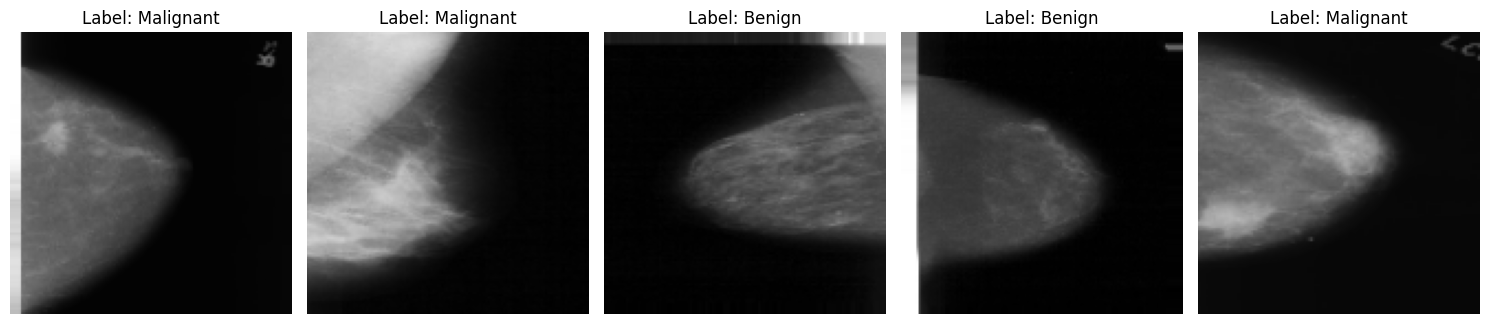

In [ ]:
# Randomly plotting our images
import matplotlib.pyplot as plt
import random

# Sample size for plotting
sample_size = 5

# Randomly selecting a few samples from your dataset
selected_samples = random.sample(range(len(images)), sample_size)

# Creating a subplot with rows and columns
rows = 1
cols = sample_size

# Seting up our subplot
fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
arr1 = np.array([1,0,0])
arr2=np.array([0,1,0])
arr3=np.array([0,0,1])

# Ploting selected images in the subplot
for i, ax in zip(selected_samples, axes):
    image = images[i]
    label = labels[i]
    # Assuming images are NumPy arrays
    ax.imshow(image)
    if np.array_equal(label, arr1):
      ax.set_title(f"Label: Benign")
    elif np.array_equal(label, arr2):
      ax.set_title(f"Label: Malignant")
    else:
      ax.set_title(f"Label: Normal")
    ax.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

In [ ]:
labels[0]

array([1., 0., 0.], dtype=float32)

In [ ]:
# Dividing dataset to train test and validaiton sets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Saving images to variable X and corresponding labels to variable y
X = images
y = labels

# Shuffling the data
X, y_encoded = shuffle(X, y, random_state=42)

# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [ ]:
# Building our CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Apply Batch Normalization after convolution
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Apply Batch Normalization after convolution
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())  # Apply Batch Normalization after convolution
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())  # Apply Batch Normalization after dense layer

model.add(Dense(3, activation='softmax'))

In [ ]:
# Compiling our model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Converting our data into numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

# Converting test datasets to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# Training our model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/30
38/38 [==============================] - 36s 848ms/step - loss: 1.1788 - accuracy: 0.4785 - val_loss: 1.3181 - val_accuracy: 0.2450
Epoch 2/30
38/38 [==============================] - 33s 849ms/step - loss: 0.7674 - accuracy: 0.6697 - val_loss: 1.9525 - val_accuracy: 0.2384
Epoch 3/30
38/38 [==============================] - 32s 852ms/step - loss: 0.6981 - accuracy: 0.6978 - val_loss: 2.8652 - val_accuracy: 0.2384
Epoch 4/30
38/38 [==============================] - 32s 852ms/step - loss: 0.6318 - accuracy: 0.7475 - val_loss: 3.4060 - val_accuracy: 0.2384
Epoch 5/30
38/38 [==============================] - 33s 863ms/step - loss: 0.5972 - accuracy: 0.7632 - val_loss: 4.0546 - val_accuracy: 0.2384
Epoch 6/30
38/38 [==============================] - 33s 861ms/step - loss: 0.5126 - accuracy: 0.7906 - val_loss: 3.4930 - val_accuracy: 0.2318
Epoch 7/30
38/38 [==============================] - 33s 875ms/step - loss: 0.4629 - accuracy: 0.8179 - val_loss: 5.1509 - val_accuracy: 0.2384

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 32)        128       
 chNormalization)                                                
                                                        

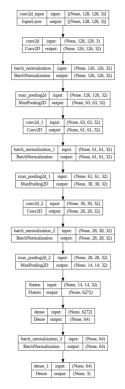

In [ ]:
from tensorflow.keras.utils import plot_model

# Displaying the model architecture summary
history.model.summary()

# Saving the model architecture plot to a file
plot_model(history.model, to_file='cnn_model_plot.png', show_shapes=True, show_layer_names=True)

# Displaying the model architecture plot within the script
img = plt.imread('cnn_model_plot.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming X_test and y_test are your test set and labels
# X_test = ...
# y_test = ...

# Make predictions
batch_size = 4  # or any other value
y_pred_batches = []

for i in range(0, len(X_test), batch_size):
    batch_predictions = model.predict(X_test[i:i+batch_size])
    y_pred_batches.append(batch_predictions)

y_pred = np.concatenate(y_pred_batches, axis=0)
# Convert predictions to binary indicator matrix
threshold = 0.5  # You can adjust the threshold based on your needs
predicted_classes = (y_pred > threshold).astype(int)

# Ensure y_test is in the correct format for multilabel classification
# y_test = [[1, 0, 1], [0, 1, 0], [1, 1, 1], ...]

# Compute accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 33ms/step
Accuracy: 57.62%


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming y_test is your true labels in the format array([0., 1., 0.], dtype=float32)
# predicted_classes is the output of your model in the same format

# Convert float values to integers (assuming binary labels)
y_test = y_test.astype(int)
predicted_classes = predicted_classes.astype(int)

# Compute accuracy
accuracy = accuracy_score(y_test, predicted_classes)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 57.62%


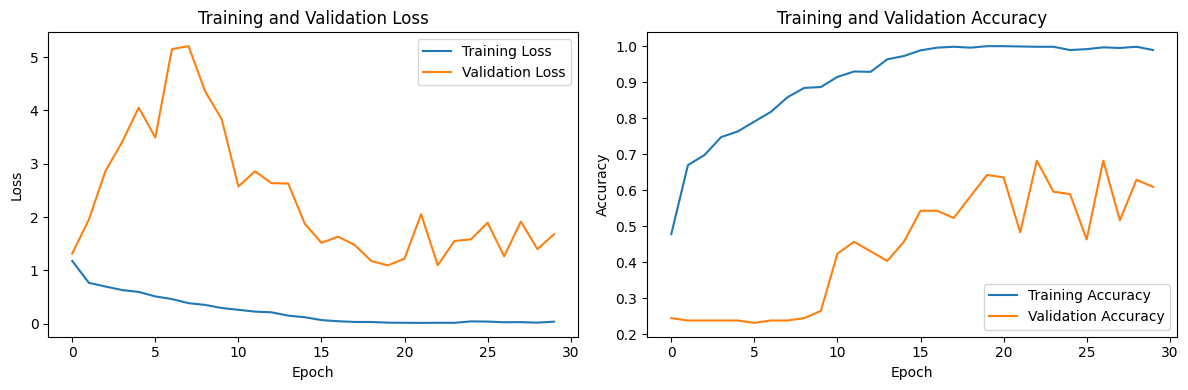

In [ ]:
# Model Performance during training

# Training and validation loss plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training and validation accuracy plots
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

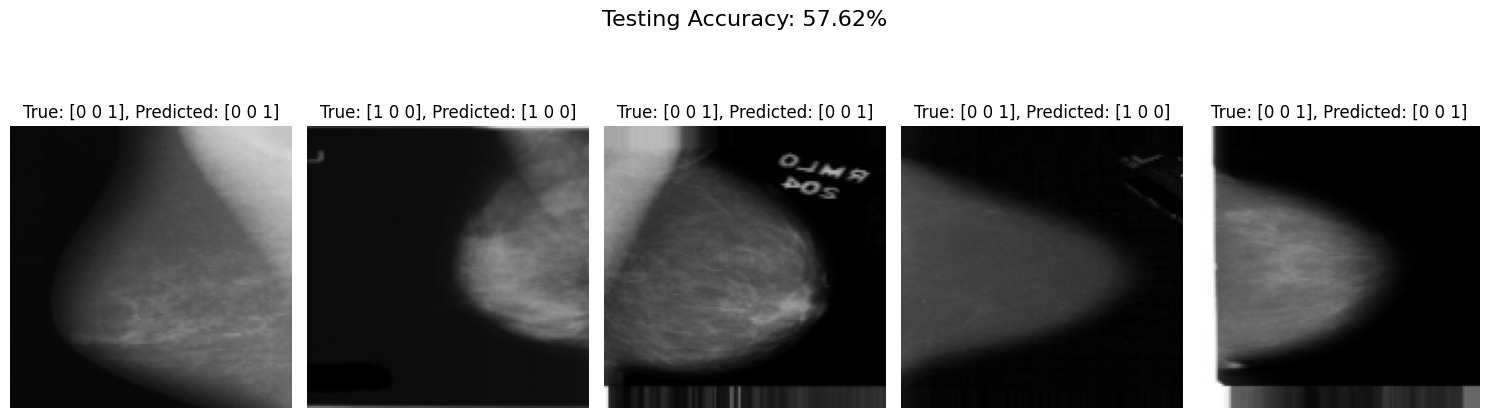

In [ ]:
# We will need to convert the probability values into binary predictions. First we set a threshold value to divide the probability values into corresponding classes
threshold = 0.5
binary_predictions = (y_pred > threshold).astype(int)

# Calculating testing accuracy
test_accuracy = np.sum(binary_predictions.squeeze() == y_test) / len(y_test)

# Sample size for plotting
test_size = 5

# Randomly selecting a few samples from the testing set
test_samples = np.random.choice(range(len(X_test)), test_size, replace=False)

# Now we create a subplot with rows and columns
rows = 1
cols = test_size

# Setting up the subplot
fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

# Plotting the selected images with corresponding predictions of our model
for i, ax in zip(test_samples, axes):
    image = X_test[i]
    true_label = y_test[i]
    predicted_label = binary_predictions[i]
    ax.imshow(image)
    ax.set_title(f"True: {true_label}, Predicted: {predicted_label}")
    ax.axis('off')  # Turning off axis labels as it overlaps with our class labels on the plot

#Display testing accuracy on the plot
fig.suptitle(f"Testing Accuracy: {accuracy * 100:.2f}%", fontsize=16)

#Adjusting layout to prevent clipping
plt.tight_layout(rect=[0, 0.1, 1, 0.9])  # Adjust the top margin to make space for the title
plt.show()